# **FORD STOCK PREDICTION**

data=["https://finance.yahoo.com/quote/FORD/history"]

---



**dataabout**

The dataset comprises key financial metrics for Ford Motor Company's stock, including date, opening price, highest price, lowest price, closing price, adjusted closing price, and trading volume.

---



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data=pd.read_csv("/content/FORD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,1.04,1.07,1.03,1.03,1.03,19500
1,2023-01-04,1.01,1.08,1.01,1.03,1.03,37400
2,2023-01-05,1.07,1.08,1.05,1.08,1.08,26800
3,2023-01-06,1.09,1.16,1.09,1.11,1.11,38300
4,2023-01-09,1.14,1.14,1.06,1.12,1.12,39600
...,...,...,...,...,...,...,...
245,2023-12-22,0.77,0.77,0.72,0.76,0.76,42000
246,2023-12-26,0.68,0.76,0.68,0.72,0.72,70500
247,2023-12-27,0.71,0.73,0.71,0.72,0.72,27900
248,2023-12-28,0.71,0.74,0.69,0.70,0.70,59900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.00000,250.00000,250.000000
mean,0.947600,0.969880,0.925520,0.94416,0.94416,23808.000000
std,0.176293,0.180195,0.174869,0.17861,0.17861,25478.401279
min,0.680000,0.700000,0.590000,0.63000,0.63000,2800.000000
25%,0.790000,0.802500,0.762500,0.78000,0.78000,9725.000000
50%,0.940000,0.970000,0.930000,0.94000,0.94000,17300.000000
75%,1.067500,1.080000,1.030000,1.05750,1.05750,27975.000000
max,1.350000,1.360000,1.300000,1.36000,1.36000,232300.000000


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

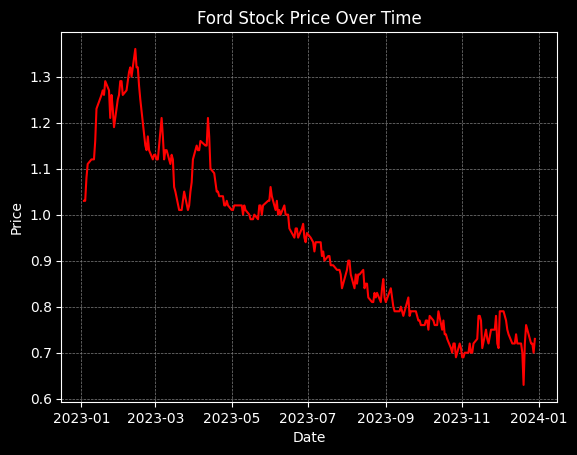

In [8]:
plt.style.use('dark_background')

plt.plot(data.index, data['Close'], color='red')
plt.title('Ford Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()


**ACF%PACF**

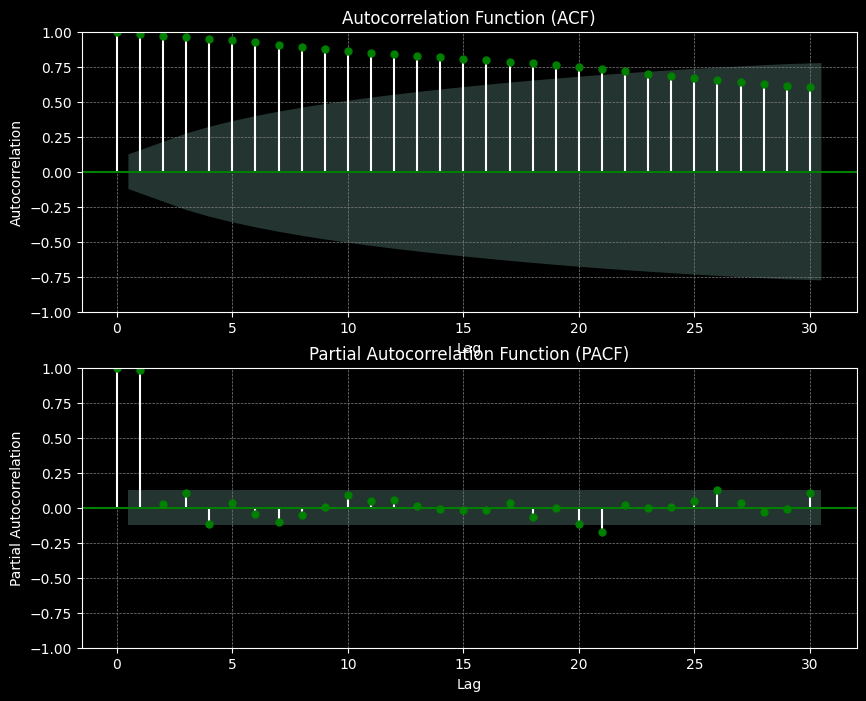

In [9]:
plt.style.use('dark_background')

fig, ax = plt.subplots(2, figsize=(10, 8))

plot_acf(data['Close'], ax=ax[0], lags=30, color='green')
ax[0].set_title('Autocorrelation Function (ACF)')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')

plot_pacf(data['Close'], ax=ax[1], lags=30, color='green')
ax[1].set_title('Partial Autocorrelation Function (PACF)')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')

for i in range(2):
    ax[i].grid(color='grey', linestyle='--', linewidth=0.5)

plt.show()


**FEATURE ENGINEERNG**

In [10]:
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

**AR model build**

In [12]:
lags = [1,2]
model = AutoReg(train['Close'], lags=lags)
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**MODEL EVALUATION**

In [13]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
mae = mean_absolute_error(test['Close'], predictions)
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.026841156552261703
Mean Squared Error: 0.0010535364342767787
Root Mean Squared Error: 0.03245822598782593


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


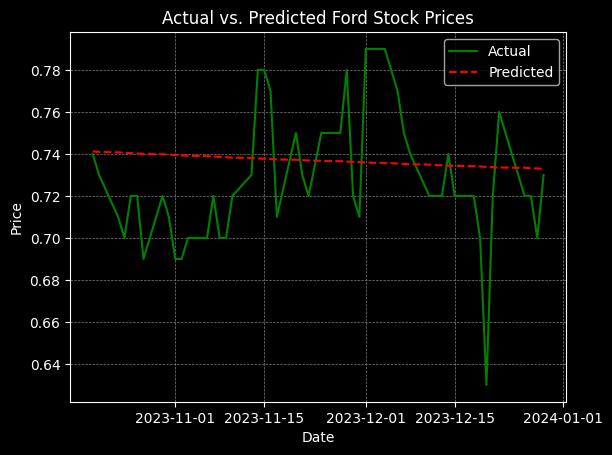

In [14]:
plt.plot(test.index, test['Close'], color='green', label='Actual')

plt.plot(test.index, predictions, color='red', linestyle='--', label='Predicted')

plt.title('Actual vs. Predicted Ford Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(color='grey', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()
